<a href="https://colab.research.google.com/github/fbeilstein/algorithms/blob/master/arrays_two_pointers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Visualization code

str_style = '''
<style>
table {
  border-collapse: collapse;
}

td {
  min-width:30px;
  height: 30px;
  position: relative; 
  text-align:center; 
  color: #00000080;
  font-size:20px;
  font-weight: bolder;
  padding: 19px;
}

.border {
  border: 2px solid #d6d6d6ff;
}

.noborder {
  border: 0px;
}
</style>
'''

def enclose_element(element, color, txt_color, border=True):
  res  = '\t<td bgcolor="' + color + '" '
  res += 'class="border"' if border else 'class="noborder"'
  if txt_color: res += 'style="color:' + str(txt_color) + '" ';
  res += '>' + str(element) + '</td>'
  return res

def horizontal_tbl(array, colors, txt_colors, borders):
  result = '<table>\n'
  for row, c_row, tc_row, has_border in zip(array, colors, txt_colors, borders):
    result += '<tr>\n'
    for e, c, tc in zip(row, c_row, tc_row):
      result += enclose_element(e, c, tc, has_border) + '\n'
    result += '</tr>\n'
  result += '</table>\n'
  return result

def array_to_html(array, colors, txt_colors, borders):
  return str_style + horizontal_tbl(array, colors, txt_colors, borders)

def visualize_array(array, colors, txt_colors, borders):
  array_str = array_to_html(array, colors, txt_colors, borders)
  import IPython
  from google.colab import output
  display(IPython.display.HTML(array_str))


## Arithmetic Slices

In [ ]:
class Solution:
    def numberOfArithmeticSlices(self, nums: List[int]) -> int:
        if len(nums) < 3:
            return 0
        diff = nums[1] - nums[0]
        old_elem = nums[1]
        distance = 0
        out = 0
        for e in nums[2:]:
            if e - old_elem == diff:
                distance += 1
                out += distance
            else:
                distance = 0
                diff = e - old_elem
            old_elem = e
        return out

![](https://assets.leetcode.com/users/images/32c39a91-9b51-476d-889b-50fae198f402_1611970000.094286.png)

## Detect Pattern of Length M Repeated K or More Times

In [ ]:
class Solution:
    def containsPattern(self, arr: List[int], m: int, k: int) -> bool:
        accumulator = 0
        for idx in range(m, len(arr)):
            if arr[idx] == arr[idx - m]:
                accumulator += 1
                if accumulator >= m*(k-1):
                    return True
            else:
                accumulator = 0
        return False

In [ ]:
arr = [1,3,1,1,2,1,2,1,1,1,3]
m = 2
k = 2

accumulator = 0
colors = [['#ffffff'] * len(arr), ['#ffffff'] * len(arr)]
for idx in range(m, len(arr)):
  disp = [arr, [""] * len(arr)]
  disp[1][idx] += '<b style="color:green">↑</b>'
  disp[1][idx - m] += '<b style="color:red">↑</b>'
  if arr[idx] == arr[idx - m]:
    accumulator += 1
    colors[0][idx-m] = '#00aa00'
    visualize_array(disp, colors, [['#000000'] * len(arr)] * 2, [True, False])
    if accumulator >= m*(k-1):
      print(True)
      break
  else:
    visualize_array(disp, colors, [['#000000'] * len(arr)] * 2, [True, False])
    accumulator = 0
  
else:
  print(False)

1,3,1,1,2,1,2,1,1,1,3
↑,,↑,,,,,,,,


1,3,1,1,2,1,2,1,1,1,3
,↑,,↑,,,,,,,


1,3,1,1,2,1,2,1,1,1,3
,,↑,,↑,,,,,,


1,3,1,1,2,1,2,1,1,1,3
,,,↑,,↑,,,,,


1,3,1,1,2,1,2,1,1,1,3
,,,,↑,,↑,,,,


True


## Longest Continuous Increasing Subsequence

In [ ]:
class Solution:
    def findLengthOfLCIS(self, nums: List[int]) -> int:
        max_lng = 1
        lng = 1
        for idx in range(1, len(nums)):
            lng = (lng + 1) if nums[idx - 1] < nums[idx] else 1
            max_lng = max(lng, max_lng)
        return max_lng

[4 2 8 6 3 7 9 7 9 3 6 8 0 4 8]


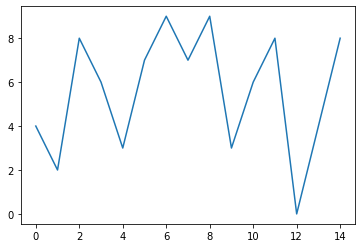

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


arr = np.random.randint(10, size = 15)
plt.plot(arr)
print(arr)